In [1]:
train_dri = 'Training'
test_dri = 'Testing'

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array

datagen = ImageDataGenerator(
    height_shift_range=0.2,
    # rescale=1/255,
    horizontal_flip = True,
    rotation_range = 10,
    validation_split= 0.1
)

training_data= datagen.flow_from_directory(train_dri,
                                           target_size = (240,240),
                                           batch_size=10,
                                           class_mode= "categorical",
                                           subset='training')

vali_data = datagen.flow_from_directory(train_dri,
                                              target_size = (240,240),
                                              batch_size = 10,
                                              class_mode = "categorical",
                                              subset = "validation")

Found 5143 images belonging to 4 classes.
Found 569 images belonging to 4 classes.


In [6]:
test_datagen = ImageDataGenerator()

test_data =  test_datagen.flow_from_directory(test_dri,
                                              target_size = (240,240),
                                              class_mode = 'categorical',
                                              shuffle = False)

Found 1311 images belonging to 4 classes.


<function matplotlib.pyplot.show(close=None, block=None)>

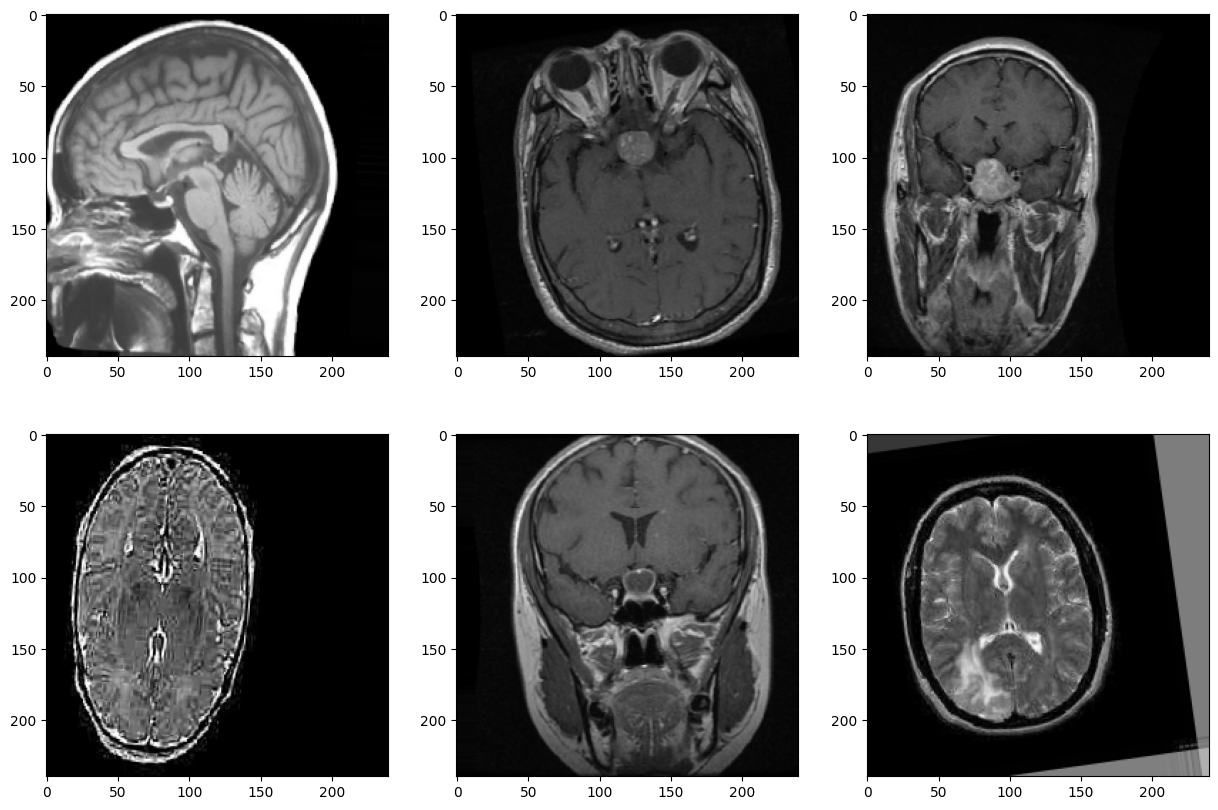

In [7]:
sample_x, sample_y= next(training_data)

import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))

for i in range(6):
    plt.subplot(2,3, i+1)
    sample= array_to_img(sample_x[i])
    plt.imshow(sample)
plt.show
    

In [8]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, GlobalMaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


Model 002: Model By using CNN + ANN

In [9]:
model002 = Sequential()
model002.add(Conv2D(32,(3,3), activation = 'relu', input_shape = (240,240,3)))
model002.add(Conv2D(64,(3,3), activation = 'relu'))
model002.add(MaxPooling2D(2,2))
model002.add(Dropout(0.3))
model002.add(Conv2D(64,(3,3), activation = 'relu'))
model002.add(Conv2D(64,(3,3), activation = 'relu'))
model002.add(Dropout(0.3))
model002.add(MaxPooling2D(2,2))
model002.add(Dropout(0.3))
model002.add(Conv2D(128,(3,3), activation = 'relu'))
model002.add(Conv2D(128,(3,3), activation = 'relu'))
model002.add(Conv2D(128,(3,3), activation = 'relu'))
model002.add(Conv2D(128,(3,3), activation = 'relu'))
model002.add(MaxPooling2D(2,2))
model002.add(Dropout(0.3))
model002.add(Conv2D(256,(3,3), activation = 'relu'))
model002.add(Conv2D(128,(3,3), activation = 'relu'))
model002.add(MaxPooling2D(2,2))
model002.add(Dropout(0.3))
model002.add(Flatten())
model002.add(Dense(512, activation = 'relu'))
model002.add(Dense(512, activation = 'relu'))
model002.add(Dropout(0.3))
model002.add(Dense(4, activation = 'softmax'))


In [10]:
model002.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 238, 238, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 236, 236, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 118, 118, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 118, 118, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 116, 116, 64)      36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 114, 114, 64)      36928     
                                                        

In [11]:
model002.compile(loss='categorical_crossentropy',
                 optimizer = 'Adam',
                 metrics = ['accuracy'])

In [12]:
checkpoint = ModelCheckpoint('Model002.keras',
                monitor='val_accuracy',
                save_best_only = True,
                mode =  'auto',
                verbose = 1)

earlyStoping = EarlyStopping(monitor='val_accuracy',
                             patience = 2,
                             mode =  'auto',
                             verbose = 1)

reduce = ReduceLROnPlateau(monitor='val_accuracy',
                           factor = 0.3,
                           patience = 5,
                           min_delta = 0.001,
                           mode = 'auto',
                           verbose = 1)

In [13]:
History002 = model002.fit(training_data,
                        epochs=7,
                        validation_data= vali_data,
                        verbose =1, callbacks= [checkpoint, earlyStoping, reduce])

Epoch 1/7


515/515 [==============================] - ETA: 0s - loss: 1.5191 - accuracy: 0.2767
Epoch 1: val_accuracy improved from -inf to 0.27944, saving model to Model002.keras
515/515 [==============================] - 270s 522ms/step - loss: 1.5191 - accuracy: 0.2767 - val_loss: 1.3841 - val_accuracy: 0.2794 - lr: 0.0010
Epoch 2/7
515/515 [==============================] - ETA: 0s - loss: 1.3845 - accuracy: 0.2782
Epoch 2: val_accuracy did not improve from 0.27944
515/515 [==============================] - 262s 508ms/step - loss: 1.3845 - accuracy: 0.2782 - val_loss: 1.3837 - val_accuracy: 0.2794 - lr: 0.0010
Epoch 3/7
515/515 [==============================] - ETA: 0s - loss: 1.3840 - accuracy: 0.2792
Epoch 3: val_accuracy did not improve from 0.27944
515/515 [==============================] - 272s 528ms/step - loss: 1.3840 - accuracy: 0.2792 - val_loss: 1.3836 - val_accuracy: 0.2794 - lr: 0.0010
Epoch 3: early stopping


In [8]:
from keras.models import load_model
model002 = load_model('Model002.keras')

In [9]:
model002.evaluate(training_data)



515/515 [==============================] - 74s 143ms/step - loss: 0.5450 - accuracy: 0.8079


[0.5450291633605957, 0.807894229888916]

In [10]:
model002.evaluate(test_data)

41/41 [==============================] - 19s 457ms/step - loss: 0.7126 - accuracy: 0.7231


[0.7125841975212097, 0.7231121063232422]

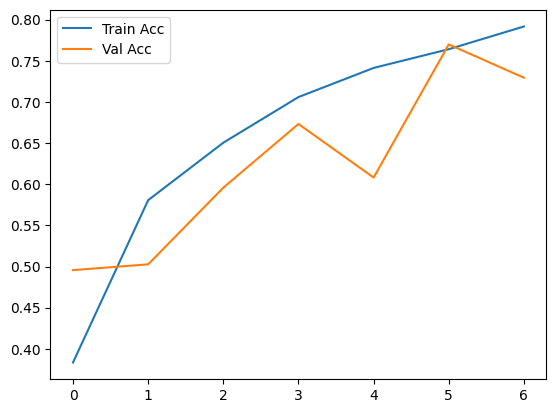

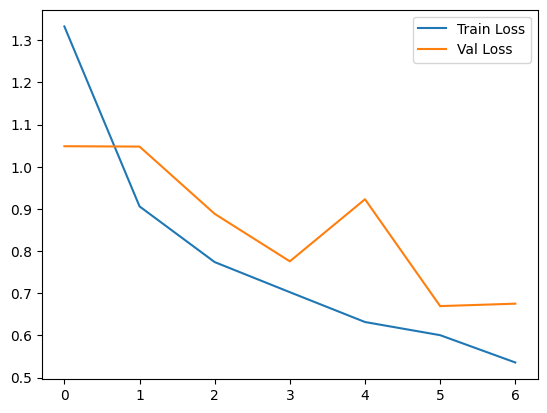

In [41]:
# Plot Accuracy and Loss
plt.plot(History002.history['accuracy'], label="Train Acc")
plt.plot(History002.history['val_accuracy'], label="Val Acc")
plt.legend()
plt.show()

plt.plot(History002.history['loss'], label="Train Loss")
plt.plot(History002.history['val_loss'], label="Val Loss")
plt.legend()
plt.show()


In [47]:
import numpy as np
from sklearn.metrics import classification_report
y_test1 = test_data.classes
y_test_predit1 = np.argmax(model002.predict(test_data),axis = 1)
y_test1
CNN_ANN_Report = classification_report(y_test1,y_test_predit1)
print(CNN_ANN_Report)

41/41 [==============================] - 15s 367ms/step
              precision    recall  f1-score   support

           0       0.82      0.60      0.69       300
           1       0.60      0.33      0.42       306
           2       0.74      0.98      0.85       405
           3       0.70      0.90      0.79       300

    accuracy                           0.72      1311
   macro avg       0.71      0.70      0.69      1311
weighted avg       0.71      0.72      0.70      1311



In [11]:
effenet= EfficientNetB1(weights='imagenet', include_top=False, input_shape=(240,240, 3))
model = effenet.output
model =  GlobalMaxPool2D()(model)
model = Dropout(0.5)(model)
model = Dense(4, activation = "softmax")(model)
model = Model(inputs= effenet.input, outputs = model)
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 240, 240, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 240, 240, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 240, 240, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 240, 240, 3)          0         ['normalization[0][0]']   

In [12]:
model.compile(optimizer=Adam(learning_rate=0.0001),
                             loss = "categorical_crossentropy",
                             metrics = ['accuracy'])

checkpoint = ModelCheckpoint('EffeNet_model.keras',
                monitor='val_accuracy',
                save_best_only = True,
                mode =  'auto',
                verbose = 1)

earlyStoping = EarlyStopping(monitor='val_accuracy',
                             patience = 2,
                             mode =  'auto',
                             verbose = 1)

reduce = ReduceLROnPlateau(monitor='val_accuracy',
                           factor = 0.3,
                           patience = 5,
                           min_delta = 0.001,
                           mode = 'auto',
                           verbose = 1)

In [ ]:
%%time

EffeNet_history = model.fit(training_data, epochs=9, validation_data= vali_data,
                        verbose =1, callbacks= [checkpoint, earlyStoping, reduce] )

Epoch 1/7


515/515 [==============================] - ETA: 0s - loss: 1.6655 - accuracy: 0.7305
Epoch 1: val_accuracy improved from -inf to 0.76626, saving model to EffeNet_model.keras
515/515 [==============================] - 277s 505ms/step - loss: 1.6655 - accuracy: 0.7305 - val_loss: 1.0649 - val_accuracy: 0.7663 - lr: 1.0000e-04
Epoch 2/7
515/515 [==============================] - ETA: 0s - loss: 0.4471 - accuracy: 0.8804
Epoch 2: val_accuracy improved from 0.76626 to 0.91564, saving model to EffeNet_model.keras
515/515 [==============================] - 274s 532ms/step - loss: 0.4471 - accuracy: 0.8804 - val_loss: 0.2248 - val_accuracy: 0.9156 - lr: 1.0000e-04
Epoch 3/7
515/515 [==============================] - ETA: 0s - loss: 0.2369 - accuracy: 0.9218
Epoch 3: val_accuracy improved from 0.91564 to 0.93322, saving model to EffeNet_model.keras
515/515 [==============================] - 272s 528ms/step - loss: 0.2369 - accuracy: 0.9218 - val_loss: 0.2062 - val_accuracy: 0.9332 -

In [12]:
model.evaluate(training_data)

515/515 [==============================] - 59s 114ms/step - loss: 0.0249 - accuracy: 0.9922


[0.024925455451011658, 0.9922224283218384]

In [13]:
model.evaluate(vali_data)

57/57 [==============================] - 7s 119ms/step - loss: 0.1094 - accuracy: 0.9666


[0.10935786366462708, 0.9666081070899963]

In [14]:
model.evaluate(test_data)

41/41 [==============================] - 14s 330ms/step - loss: 0.0487 - accuracy: 0.9817


[0.048688627779483795, 0.9816933870315552]

In [15]:
from tensorflow.keras.models import load_model


import numpy as np
y_test = test_data.classes
y_test_predit = np.argmax(model.predict(test_data),axis = 1)
y_test

41/41 [==============================] - 15s 334ms/step


array([0, 0, 0, ..., 3, 3, 3])

In [16]:
y_test_predit

array([0, 0, 0, ..., 3, 3, 3], dtype=int64)

In [17]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score

cm=confusion_matrix(y_test,y_test_predit)
cm

array([[295,   2,   0,   3],
       [  8, 291,   0,   7],
       [  1,   2, 401,   1],
       [  0,   0,   0, 300]], dtype=int64)

<Axes: >

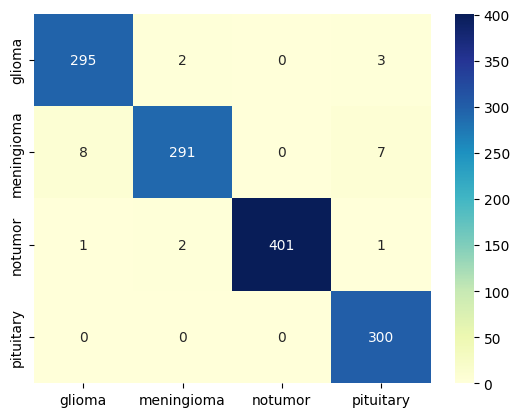

In [18]:
class_name= list(training_data.class_indices.keys())
import seaborn as sns

sns.heatmap(cm,annot=True,fmt='d',cmap='YlGnBu',xticklabels=class_name,yticklabels=class_name)

In [19]:
from sklearn.metrics import classification_report
Efficient_Net_Report = classification_report(y_test,y_test_predit)
print(Efficient_Net_Report)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       300
           1       0.99      0.95      0.97       306
           2       1.00      0.99      1.00       405
           3       0.96      1.00      0.98       300

    accuracy                           0.98      1311
   macro avg       0.98      0.98      0.98      1311
weighted avg       0.98      0.98      0.98      1311



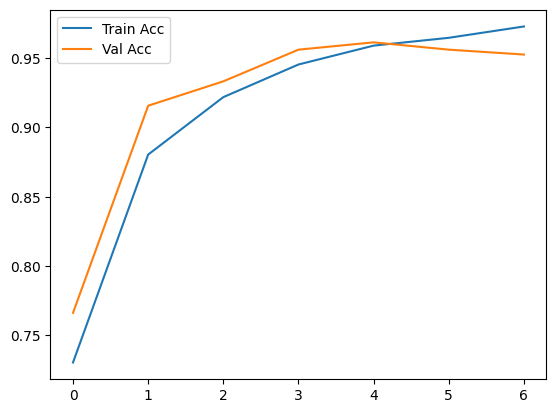

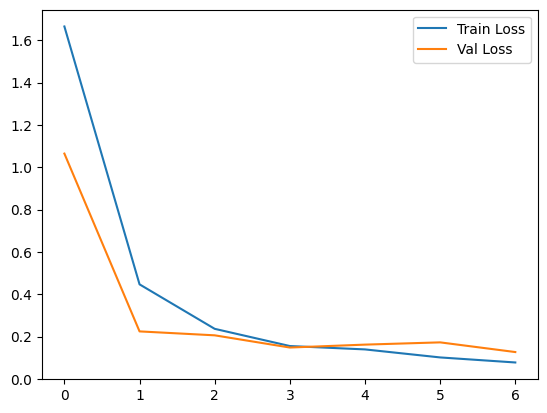

In [ ]:
# Plot Accuracy and Loss
plt.plot(EffeNet_history.history['accuracy'], label="Train Acc")
plt.plot(EffeNet_history.history['val_accuracy'], label="Val Acc")
plt.legend()
plt.show()

plt.plot(EffeNet_history.history['loss'], label="Train Loss")
plt.plot(EffeNet_history.history['val_loss'], label="Val Loss")
plt.legend()
plt.show()


In [26]:
import PIL
import os
from tensorflow.keras.preprocessing import image
classDit= {0:'glioma', 1:'meningioma',2: 'notumor',3: 'pituitary'}

images=[]
predictions=[]
orginal=[]

for i in os.listdir('Testing'):
    # print(i)
    for im in os.listdir(os.path.join('Testing', i)):
        # print(im)
        img = image.load_img((os.path.join('Testing',i,im)), target_size=(240,240,3)) 
        images.append(img)
        img = image.img_to_array(img)
        img=np.expand_dims(img, axis=0)
        predit= model.predict(img)
        predit = np.argmax(predit)
        predictions.append(classDit[predit])
        orginal.append(i)


1/1 [==============================] - 0s 54ms/step


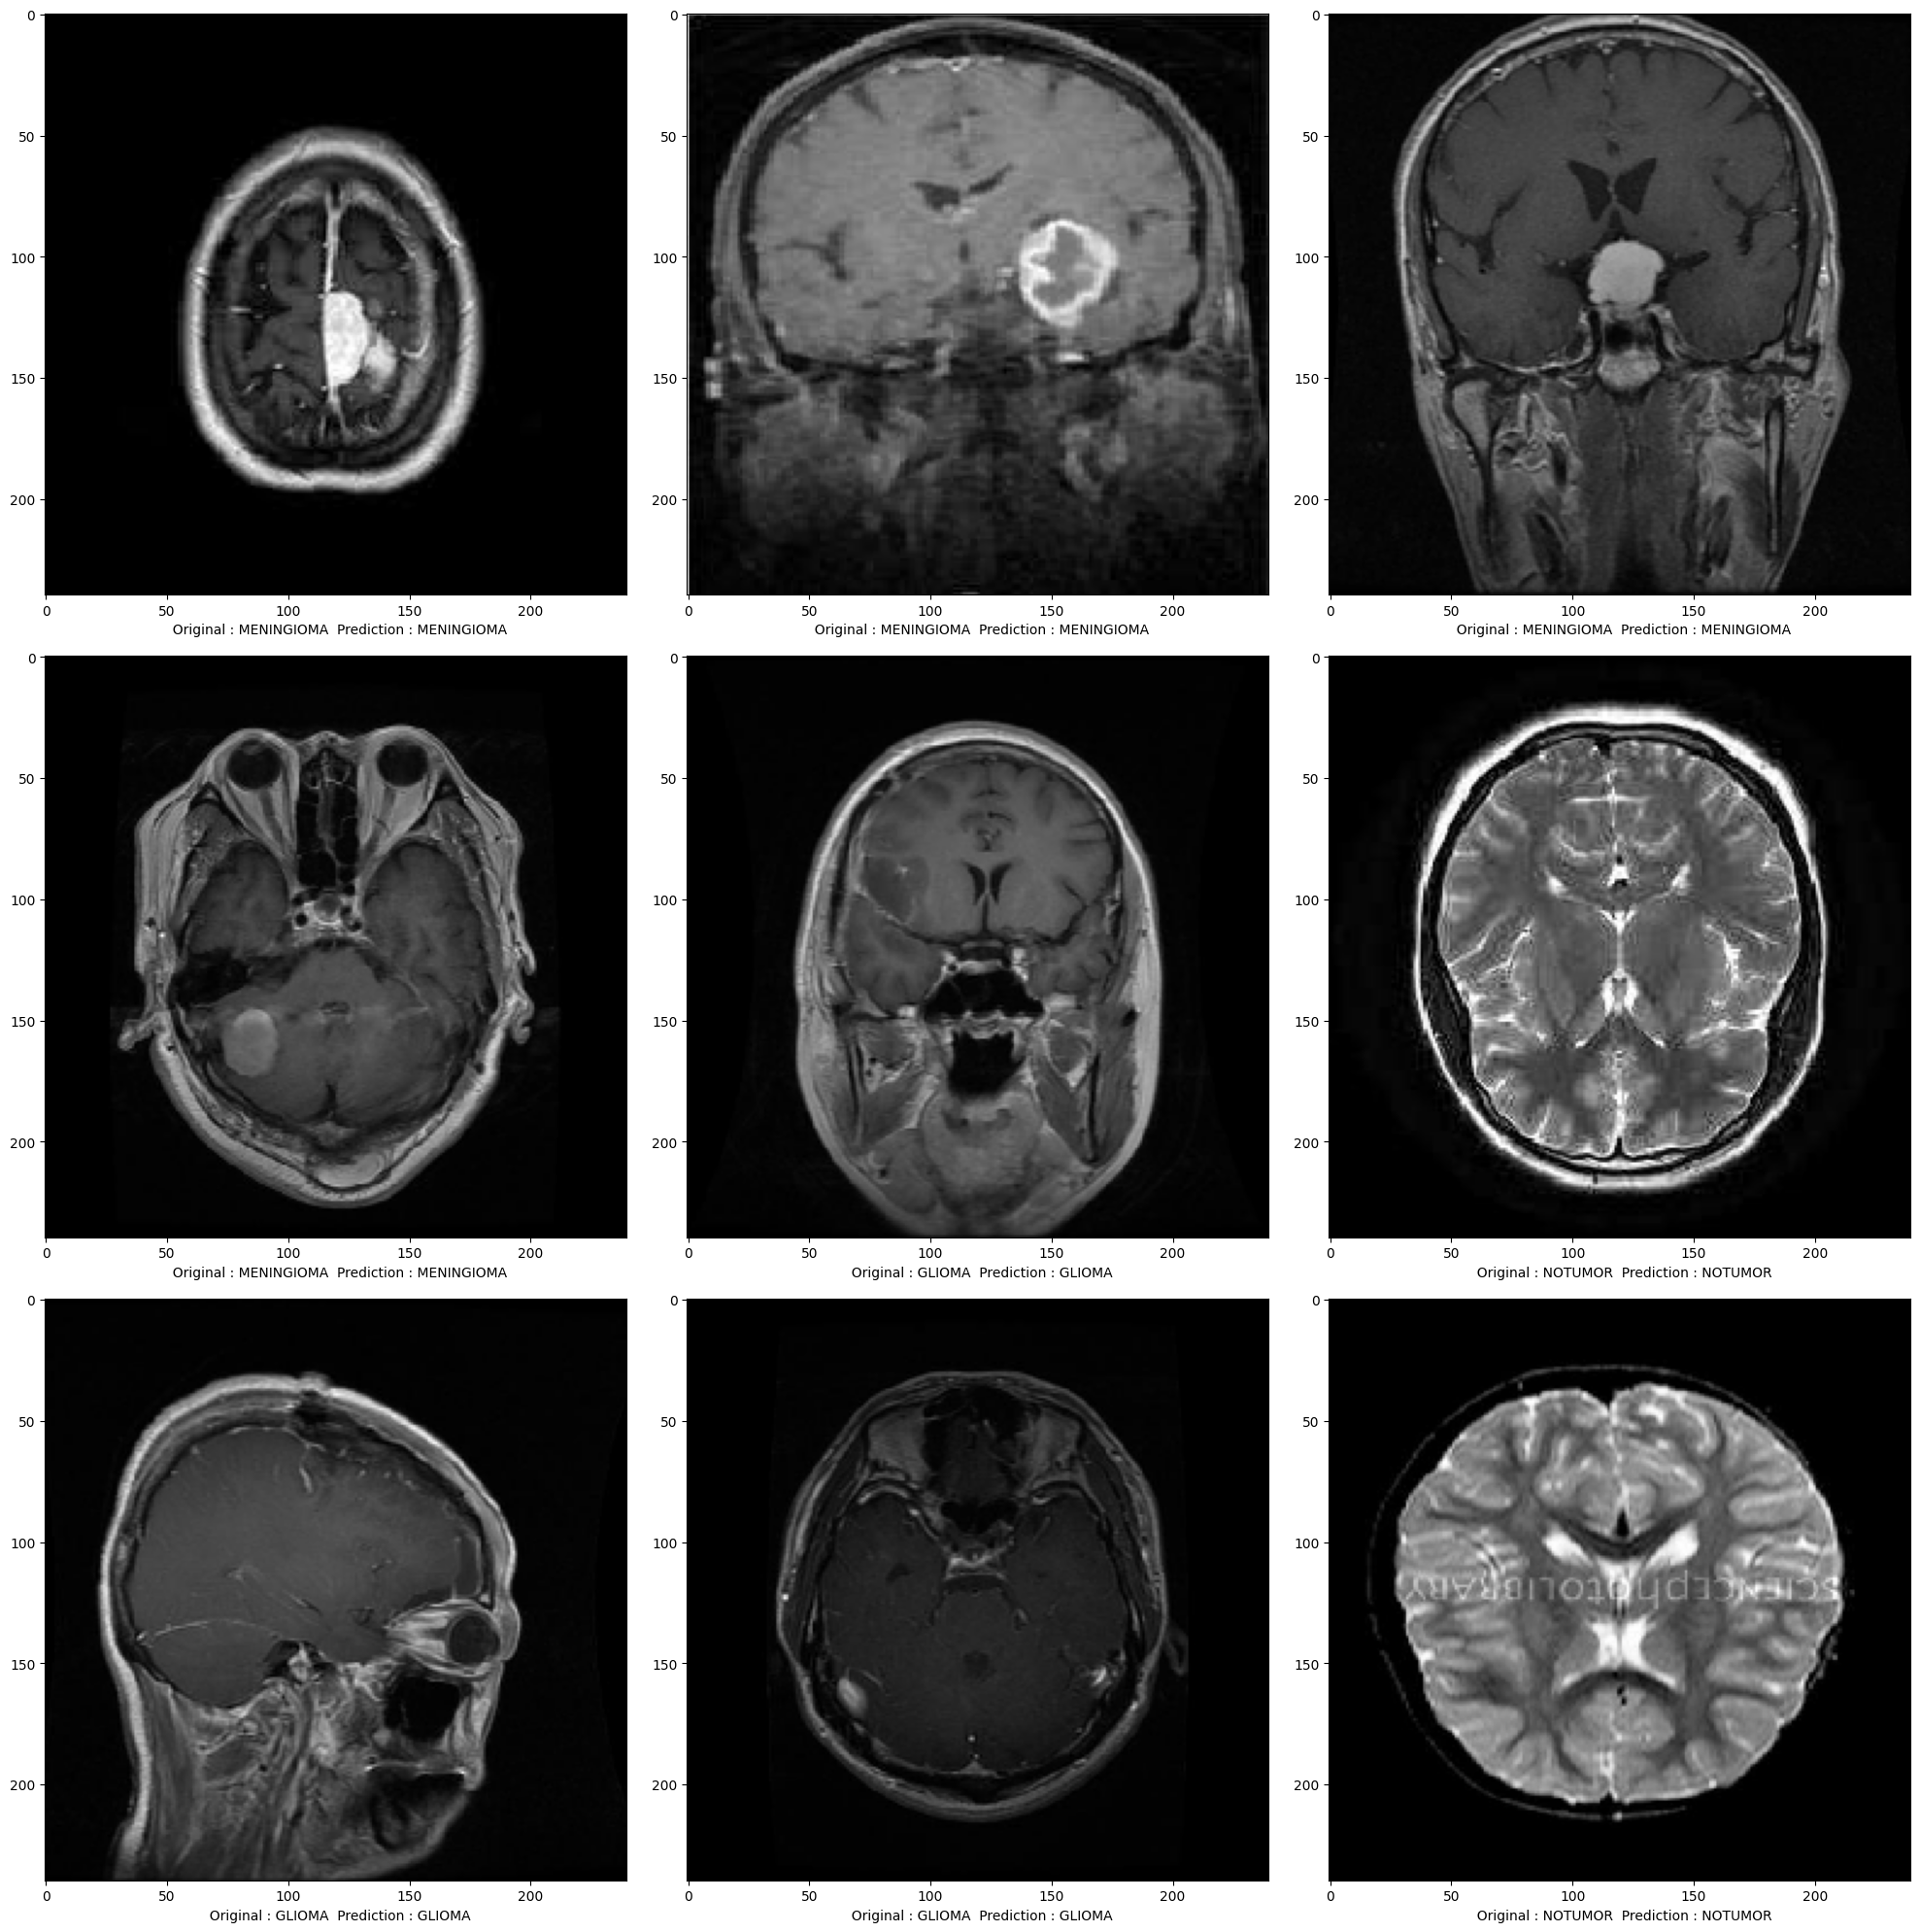

In [27]:
fig=plt.figure(figsize=(20,20))
import random

for i in range(9):
    j = random.randint(0, len(images))
    fig.add_subplot(3,3,i+1)
    plt.xlabel( "  Original : " + orginal[j].upper()+"  Prediction : "+ predictions[j].upper())
    plt.imshow(images[j])
fig.tight_layout()
plt.show()
    

In [28]:
from sklearn.metrics import accuracy_score

accuracy_score(orginal,predictions)

0.9565217391304348

In [29]:
from PIL import Image
uploadedIMG=r'E:\Data Science\CAPSTONE002\BrainTumorMRI\Testing\notumor\Te-no_0016.jpg'
img = Image.open(uploadedIMG).convert("RGB")   
img = img.resize((240, 240))                   
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Prediction
pred = model.predict(img_array)
class_idx = np.argmax(pred, axis=1)[0]

# Class labels
classes = ['glioma', 'meningioma', 'normal', 'pituitary']
print("###  Predicted Label:", classes[class_idx].upper())

1/1 [==============================] - 0s 56ms/step
###  Predicted Label: NORMAL


In [30]:
from tensorflow.keras.applications import DenseNet121

DenseNet= DenseNet121(weights="imagenet", include_top= False, input_shape=(240,240,3))
Model001= DenseNet.output
Model001= GlobalMaxPool2D()(Model001)
Model001=Dropout(0.5)(Model001)
Model001=Dense(4,activation = 'softmax')(Model001)
Model001= Model(inputs= DenseNet.input, outputs = Model001)
Model001.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 240, 240, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 246, 246, 3)          0         ['input_2[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 120, 120, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 120, 120, 64)         256       ['conv1/conv[0][0]']    

In [31]:
Model001.compile(optimizer=Adam(learning_rate=0.0001),
                                loss = 'categorical_crossentropy',
                                metrics = ['accuracy'])

DNcheckpoint = ModelCheckpoint('DenseNet_model.keras',
                               monitor = 'val_accuracy',
                               save_best_only = True,
                               mode =  'auto',
                               verbose = 1)

DNearly_stoping = EarlyStopping(monitor= 'val_accuracy',
                                patience = 2,
                                mode = 'auto',
                                verbose = 1)

Dnreduce = ReduceLROnPlateau(monitor= 'val_accuracy',
                             factor = 0.3,
                             patience = 5,
                             min_delta = 0.001,
                             verbose = 1)

In [32]:
DenseNet_history = Model001.fit(training_data, epochs=7, validation_data= vali_data,
                    verbose = 1, callbacks= [DNcheckpoint, DNearly_stoping, Dnreduce])

Epoch 1/7
515/515 [==============================] - ETA: 0s - loss: 1.2709 - accuracy: 0.7980
Epoch 1: val_accuracy improved from -inf to 0.89455, saving model to DenseNet_model.keras
515/515 [==============================] - 340s 626ms/step - loss: 1.2709 - accuracy: 0.7980 - val_loss: 0.6961 - val_accuracy: 0.8946 - lr: 1.0000e-04
Epoch 2/7
515/515 [==============================] - ETA: 0s - loss: 0.5238 - accuracy: 0.9098
Epoch 2: val_accuracy improved from 0.89455 to 0.94728, saving model to DenseNet_model.keras
515/515 [==============================] - 320s 621ms/step - loss: 0.5238 - accuracy: 0.9098 - val_loss: 0.2427 - val_accuracy: 0.9473 - lr: 1.0000e-04
Epoch 3/7
515/515 [==============================] - ETA: 0s - loss: 0.3119 - accuracy: 0.9316
Epoch 3: val_accuracy did not improve from 0.94728
515/515 [==============================] - 319s 619ms/step - loss: 0.3119 - accuracy: 0.9316 - val_loss: 0.4888 - val_accuracy: 0.9069 - lr: 1.0000e-04
Epoch 4/7
515/515 [======

In [34]:
Model001 = load_model('DenseNet_model.keras')
Model001.evaluate(training_data)

515/515 [==============================] - 102s 195ms/step - loss: 0.0719 - accuracy: 0.9732


[0.0719253420829773, 0.9731674194335938]

In [35]:
Model001.evaluate(test_data)

41/41 [==============================] - 24s 573ms/step - loss: 0.0762 - accuracy: 0.9802


[0.07623302936553955, 0.980167806148529]

In [36]:

import numpy as np
DNy_test = test_data.classes
DNy_test_predit = np.argmax(Model001.predict(test_data),axis = 1)
DNy_test

41/41 [==============================] - 25s 580ms/step


array([0, 0, 0, ..., 3, 3, 3])

[[295   4   0   1]
 [  7 288   5   6]
 [  2   0 403   0]
 [  0   1   0 299]]


<Axes: >

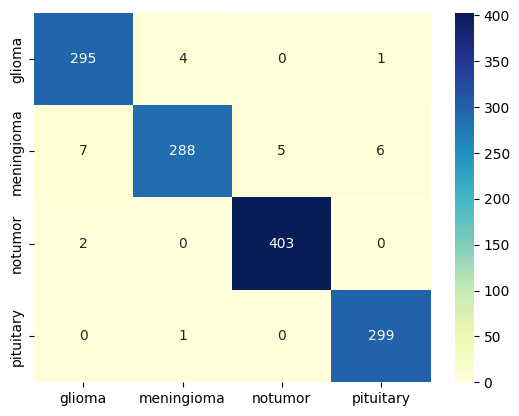

In [37]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score

DNcm=confusion_matrix(DNy_test,DNy_test_predit)
print(DNcm)
class_name= list(training_data.class_indices.keys())
import seaborn as sns

sns.heatmap(DNcm,annot=True,fmt='d',cmap='YlGnBu',xticklabels=class_name,yticklabels=class_name)

In [43]:
from sklearn.metrics import classification_report
Dense_Net_report = classification_report(DNy_test,DNy_test_predit)
print(Dense_Net_report)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       300
           1       0.98      0.94      0.96       306
           2       0.99      1.00      0.99       405
           3       0.98      1.00      0.99       300

    accuracy                           0.98      1311
   macro avg       0.98      0.98      0.98      1311
weighted avg       0.98      0.98      0.98      1311



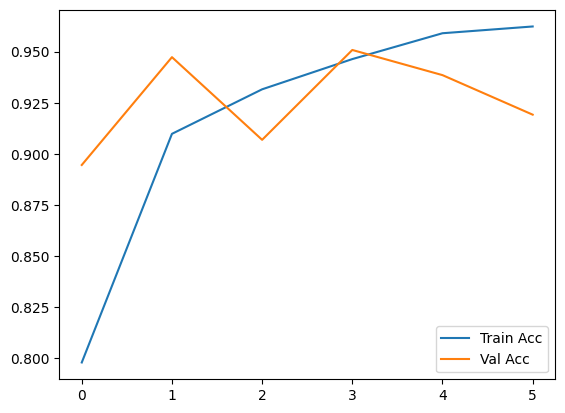

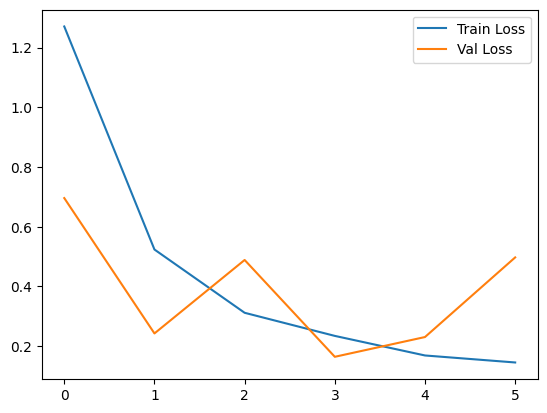

In [51]:
# Plot Accuracy and Loss
plt.plot(DenseNet_history.history['accuracy'], label="Train Acc")
plt.plot(DenseNet_history.history['val_accuracy'], label="Val Acc")
plt.legend()
plt.show()

plt.plot(DenseNet_history.history['loss'], label="Train Loss")
plt.plot(DenseNet_history.history['val_loss'], label="Val Loss")
huv=plt.legend()
plt.show()


In [59]:
print(f"CNN + ANN Report :\n\n {CNN_ANN_Report}\n\nEfficient Net Report :\n {Efficient_Net_Report}\n\nDense net report :\n {Dense_Net_report}")

CNN + ANN Report :

               precision    recall  f1-score   support

           0       0.82      0.60      0.69       300
           1       0.60      0.33      0.42       306
           2       0.74      0.98      0.85       405
           3       0.70      0.90      0.79       300

    accuracy                           0.72      1311
   macro avg       0.71      0.70      0.69      1311
weighted avg       0.71      0.72      0.70      1311


Efficient Net Report :
               precision    recall  f1-score   support

           0       0.98      0.91      0.95       300
           1       0.92      0.91      0.92       306
           2       0.98      0.99      0.99       405
           3       0.93      1.00      0.96       300

    accuracy                           0.96      1311
   macro avg       0.96      0.95      0.95      1311
weighted avg       0.96      0.96      0.96      1311


Dense net report :
               precision    recall  f1-score   support

        

Grad-Cam


https://github.com/gkeechin/vizgradcam 


In [11]:
import cv2
import numpy as np
from PIL import Image
import tensorflow as tf
import tensorflow.keras as K
import matplotlib.pyplot as plt
from skimage.transform import resize
from tensorflow.keras.models import Model


def VizGradCAM(model, image, interpolant=0.5, plot_results=True):
    """VizGradCAM - Displays GradCAM based on Keras / TensorFlow models
    using the gradients from the last convolutional layer. This function
    should work with all Keras Application listed here:
    https://keras.io/api/applications/

    Parameters:
    model (keras.model): Compiled Model with Weights Loaded
    image: Image to Perform Inference On
    plot_results (boolean): True - Function Plots using PLT
                            False - Returns Heatmap Array

    Returns:
    Heatmap Array?
    """
    # Sanity Check
    assert (
        interpolant > 0 and interpolant < 1
    ), "Heatmap Interpolation Must Be Between 0 - 1"

    last_conv_layer = next(
        x for x in model.layers[::-1] if isinstance(x, K.layers.Conv2D)
    )
    target_layer = model.get_layer(last_conv_layer.name)

    original_img = image
    img = np.expand_dims(original_img, axis=0)
    prediction = model.predict(img)

    # Obtain Prediction Index
    prediction_idx = np.argmax(prediction)

    # Compute Gradient of Top Predicted Class
    with tf.GradientTape() as tape:
        gradient_model = Model([model.inputs], [target_layer.output, model.output])
        conv2d_out, prediction = gradient_model(img)
        # Obtain the Prediction Loss
        loss = prediction[:, prediction_idx]

    # Gradient() computes the gradient using operations recorded
    # in context of this tape
    gradients = tape.gradient(loss, conv2d_out)

    # Obtain the Output from Shape [1 x H x W x CHANNEL] -> [H x W x CHANNEL]
    output = conv2d_out[0]

    # Obtain Depthwise Mean
    weights = tf.reduce_mean(gradients[0], axis=(0, 1))

    # Create a 7x7 Map for Aggregation
    activation_map = np.zeros(output.shape[0:2], dtype=np.float32)

    # Multiply Weights with Every Layer
    for idx, weight in enumerate(weights):
        activation_map += weight * output[:, :, idx]

    # Resize to Size of Image
    activation_map = cv2.resize(
        activation_map.numpy(), (original_img.shape[1], original_img.shape[0])
    )

    # Ensure No Negative Numbers
    activation_map = np.maximum(activation_map, 0)

    # Convert Class Activation Map to 0 - 255
    activation_map = (activation_map - activation_map.min()) / (
        activation_map.max() - activation_map.min()
    )
    activation_map = np.uint8(255 * activation_map)

    # Convert to Heatmap
    heatmap = cv2.applyColorMap(activation_map, cv2.COLORMAP_JET)

    # Superimpose Heatmap on Image Data
    original_img = np.uint8(
        (original_img - original_img.min())
        / (original_img.max() - original_img.min())
        * 255
    )

    cvt_heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    # Enlarge Plot
    plt.rcParams["figure.dpi"] = 100

    if plot_results == True:
        plt.imshow(
            np.uint8(original_img * interpolant + cvt_heatmap * (1 - interpolant))
        )
    else:
        return cvt_heatmap

In [56]:
from keras.models import load_model

model= load_model('DenseNet_model.keras')

1/1 [==============================] - 1s 1s/step


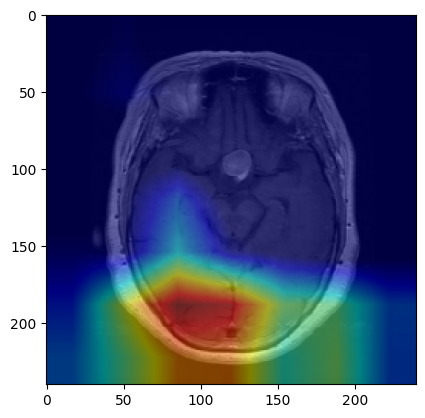

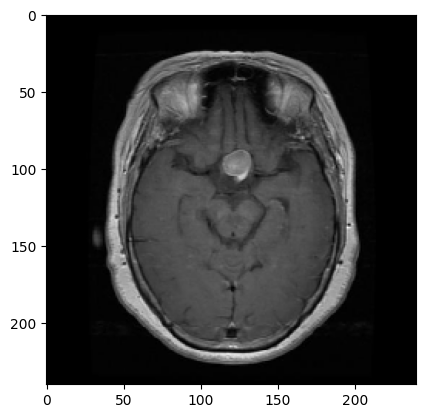

In [57]:
img = image.load_img(r'Testing\pituitary\Te-pi_0040.jpg', target_size=(240,240,3)) 
imgg = image.img_to_array(img)
VizGradCAM(model, imgg, plot_results=True)
plt.show()
plt.imshow(img)
